In [4]:
import pandas as pd

# Display 6 columns for viewing purposes
pd.set_option('display.max_columns', 6)
# Reduce decimal points to 2
pd.options.display.float_format = '{:,.2f}'.format

## Exercise 1

In [58]:
url3 = 'https://raw.githubusercontent.com/QuantEcon/lecture-python/master/source/_static/lecture_specific/pandas_panel/employ.csv'

In [60]:
employ_long = pd.read_csv(url3)
employ_wide = employ_long.pivot_table(values = 'Value',
                                      index = 'DATE',
                                      columns = ['GEO', 'AGE', 'UNIT', 'SEX', 'INDIC_EM'])
employ_wide.index = pd.to_datetime(employ.index)

In [27]:
employ_wide.head()

GEO                               Austria  \
AGE                   From 15 to 24 years   
UNIT       Percentage of total population   
SEX                               Females   
INDIC_EM                Active population   
DATE                                        
2007-01-01                          56.00   
2008-01-01                          56.20   
2009-01-01                          56.20   
2010-01-01                          54.00   
2011-01-01                          54.80   

GEO                                                              \
AGE                                                               
UNIT                                                              
SEX                                                               
INDIC_EM   Total employment (resident population concept - LFS)   
DATE                                                              
2007-01-01                                              50.60     
2008-01-01                                              51.30     
2009-01-01                                              50.50     
2010-01-01                                              48.90     
2011-01-01                                              49.80     

GEO                           ...  \
AGE                           ...   
UNIT                          ...   
SEX                    Males  ...   
INDIC_EM   Active population  ...   
DATE                          ...   
2007-01-01             62.90  ...   
2008-01-01             62.90  ...   
2009-01-01             62.90  ...   
2010-01-01             62.60  ...   
2011-01-01             63.60  ...   

GEO                                              United Kingdom  \
AGE                                         From 55 to 64 years   
UNIT                                           Thousand persons   
SEX                                                       Males   
INDIC_EM   Total employment (resident population concept - LFS)   
DATE                                                              
2007-01-01                                           2,342.00     
2008-01-01                                           2,397.00     
2009-01-01                                           2,370.00     
2010-01-01                                           2,343.00     
2011-01-01                                           2,315.00     

GEO                           \
AGE                            
UNIT                           
SEX                    Total   
INDIC_EM   Active population   
DATE                           
2007-01-01          4,268.00   
2008-01-01          4,340.00   
2009-01-01          4,395.00   
2010-01-01          4,394.00   
2011-01-01          4,383.00   

GEO                                                              
AGE                                                              
UNIT                                                             
SEX                                                              
INDIC_EM   Total employment (resident population concept - LFS)  
DATE                                                             
2007-01-01                                           4,131.00    
2008-01-01                                           4,204.00    
2009-01-01                                           4,193.00    
2010-01-01                                           4,186.00    
2011-01-01                                           4,164.00    

[5 rows x 1440 columns]

In [31]:
employ_wide.columns.names

FrozenList(['GEO', 'AGE', 'UNIT', 'SEX', 'INDIC_EM'])

In [41]:
# returns all values in an index level
def get_value(data, level):
    level_value = data.columns.get_level_values(level).unique().to_list()
    return level_value
    

for level_name in employ_wide.columns.names:
    level_value = get_value(employ_wide, level_name)
    
    print(level_name, ":")
    print(level_value)
    print( )

GEO :
['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Euro area (17 countries)', 'Euro area (18 countries)', 'Euro area (19 countries)', 'European Union (15 countries)', 'European Union (27 countries)', 'European Union (28 countries)', 'Finland', 'Former Yugoslav Republic of Macedonia, the', 'France', 'France (metropolitan)', 'Germany (until 1990 former territory of the FRG)', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'United Kingdom']

AGE :
['From 15 to 24 years', 'From 25 to 54 years', 'From 55 to 64 years']

UNIT :
['Percentage of total population', 'Thousand persons']

SEX :
['Females', 'Males', 'Total']

INDIC_EM :
['Active population', 'Total employment (resident population concept - LFS)']



## Exercise 2

In [76]:
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [81]:
# Only keep GEO that is a country:
geo = employ_wide.columns.get_level_values('GEO').unique().tolist()
keep = [re.match('Euro.*', g) is None for g in geo]
countries = [geo[i] for i in range(len(geo)) if keep[i]]
employ_wide = employ_wide[countries]

In [82]:
employ_f = employ_wide.xs(('Percentage of total population', 'Active population'),
                          level=('UNIT', 'INDIC_EM'),
                          axis=1)
employ_f.head()

GEO                    Austria              ...      United Kingdom        \
AGE        From 15 to 24 years              ... From 55 to 64 years         
SEX                    Females Males Total  ...             Females Males   
DATE                                        ...                             
2007-01-01               56.00 62.90 59.40  ...               49.90 68.90   
2008-01-01               56.20 62.90 59.50  ...               50.20 69.80   
2009-01-01               56.20 62.90 59.50  ...               50.60 70.30   
2010-01-01               54.00 62.60 58.30  ...               51.10 69.20   
2011-01-01               54.80 63.60 59.20  ...               51.30 68.40   

GEO               
AGE               
SEX        Total  
DATE              
2007-01-01 59.30  
2008-01-01 59.80  
2009-01-01 60.30  
2010-01-01 60.00  
2011-01-01 59.70  

[5 rows x 306 columns]

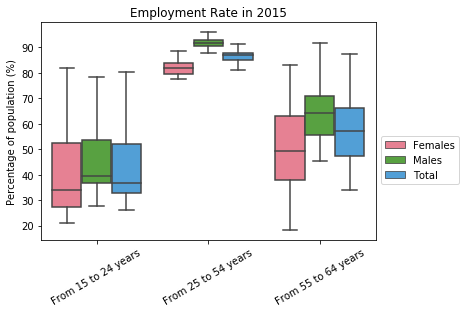

In [83]:
box = employ_f['2015'].unstack().reset_index()
sns.boxplot(x="AGE", y=0, hue="SEX", data=box, palette=("husl"), showfliers=False)
plt.xlabel('')
plt.xticks(rotation=30)
plt.ylabel('Percentage of population (%)')
plt.title('Employment Rate in 2015')
plt.legend(bbox_to_anchor=(1,0.5))
plt.show()